## Dog breeds

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from fastai.sgdr import *
from fastai.plots import *

In [7]:
PATH = "data/dogbreed/"
sz=224
arch=dn161
bs=32

In [4]:
PATH = "data/dogbreed/"
sz=224
arch=dn161
bs=64

In [5]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)
n, len(val_idxs)

(10222, 2044)

## Initial exploration

In [5]:
!ls {PATH}

labels.csv	sample_submission.csv	   test      train
labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


In [8]:
label_df = pd.read_csv(label_csv)

In [23]:
label_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [24]:
label_df.pivot_table(index='breed', aggfunc=len).sort_values('id', ascending=False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [58]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                    val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)

In [30]:
fn = PATH+data.trn_ds.fnames[0]; fn

'data/dogbreed/train/000bec180eb18c7604dcecc8fe0dba07.jpg'

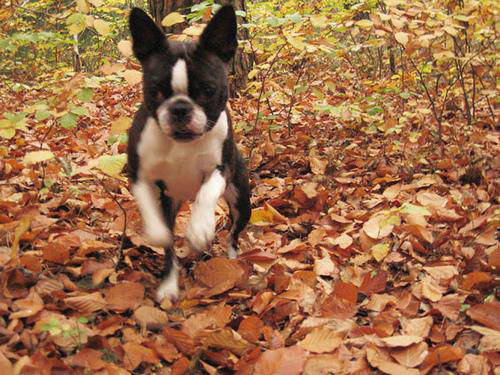

In [31]:
img = PIL.Image.open(fn); img

In [33]:
img.size

(500, 375)

In [36]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}

In [40]:
row_sz,col_sz = list(zip(*size_d.values()))

In [48]:
row_sz=np.array(row_sz); col_sz=np.array(col_sz)

In [49]:
row_sz[:5]

array([500, 500, 400, 500, 231])

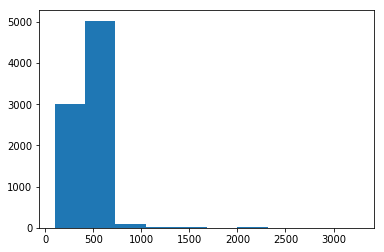

In [54]:
plt.hist(row_sz);

(array([  148.,   600.,  1307.,  1205.,  4581.,   122.,    78.,    62.,    15.,     7.]),
 array([  97. ,  186.3,  275.6,  364.9,  454.2,  543.5,  632.8,  722.1,  811.4,  900.7,  990. ]),
 <a list of 10 Patch objects>)

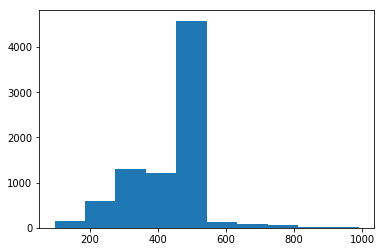

In [50]:
plt.hist(row_sz[row_sz<1000])

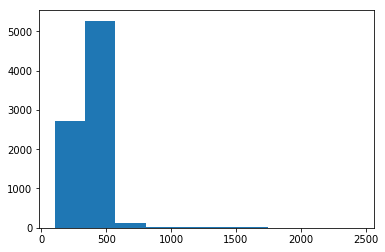

In [45]:
plt.hist(col_sz);

(array([  243.,   721.,  2218.,  2940.,  1837.,    95.,    29.,    29.,     8.,     8.]),
 array([ 102. ,  190.2,  278.4,  366.6,  454.8,  543. ,  631.2,  719.4,  807.6,  895.8,  984. ]),
 <a list of 10 Patch objects>)

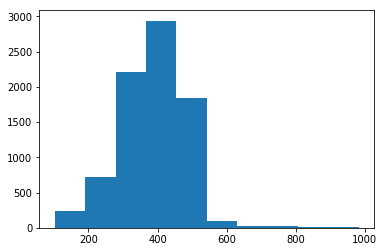

In [53]:
plt.hist(col_sz[col_sz<1000])

In [10]:
len(data.trn_ds), len(data.test_ds)

(8178, 10357)

In [80]:
len(data.classes), data.classes[:5]

(120,
 ['affenpinscher',
  'afghan_hound',
  'african_hunting_dog',
  'airedale',
  'american_staffordshire_terrier'])

## Initial model

In [8]:
def get_data(sz,bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv',
                                        val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    return data if sz>300 else data.resize(340, 'tmp')

In [9]:
data = get_data(sz,bs)

A Jupyter Widget

In [10]:
learn = ConvLearner.pretrained(arch, data, ps=0.5, precompute=True)

In [8]:
# learn.lr_find()
# learn.sched.plot()

In [11]:
lr=1e-1

In [11]:
learn.fit(lr, 2)

A Jupyter Widget

[ 0.       1.1791   0.56373  0.81761]                       
[ 1.       0.76464  0.51984  0.84261]                        



In [12]:
learn.precompute=False

In [13]:
learn.fit(lr, 1, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.61777  0.41655  0.85964]                        



In [87]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

ValueError: some parameters appear in more than one parameter group

In [16]:
learn.save('tmp')

In [13]:
learn.load('tmp')

In [14]:
lrs = np.array([1e-6, 1e-4, 1e-2])
learn.unfreeze()
learn.bn_freeze(True)

In [15]:
learn.fit(lrs, 1, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.61476  0.42629  0.86007]                        



In [43]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2, wds=wds, use_wd_sched=uwds)

A Jupyter Widget

[ 0.       0.33245  0.2187   0.93285]                        
[ 1.       0.29568  0.21755  0.9372 ]                        
[ 2.       0.23095  0.2024   0.94396]                        
[ 3.       0.25031  0.24021  0.93575]                        
[ 4.       0.21363  0.22439  0.93768]                        
[ 5.       0.17515  0.21996  0.94106]                        
[ 6.       0.16811  0.21615  0.94348]                        



In [28]:
log_preds,y = learn.TTA()
probs = np.exp(log_preds)
accuracy(log_preds,y), metrics.log_loss(y, probs)

(0.86888454011741678, 0.44108282734873372)

## Create submission

File format from Kaggle:
```
id,affenpinscher,afghan_hound,..,yorkshire_terrier
000621fb3cbb32d8935728e48679680e,0.0083,0.0,...,0.0083
```

In [27]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [21]:
data.test_ds.fnames

['test/bd817f883c35e1c77516f60e3e2bfcaf.jpg',
 'test/cd3a666d082b6cb9a44ddb1dca5eedc9.jpg',
 'test/a7b2cc836cca8fc7c844fb4cccc5401a.jpg',
 'test/5366834111cdfdc1876d2ce66ca8dead.jpg',
 'test/66f8fbb9969fcea49747c9b9a47228ad.jpg',
 'test/f96722fdd8a6a0e9ff86eee619cec34d.jpg',
 'test/d28a328d59d0b2d37fb3ae7ff0128451.jpg',
 'test/ce2f35f88dccd00f07c6373bff23308f.jpg',
 'test/d4f769129f9c415999dc400545af6053.jpg',
 'test/2d38bd285033c2f549e92293f8c07d0d.jpg',
 'test/44c9af2f490ea6d39494a348e4cc89c6.jpg',
 'test/be0547479d3ace1b57f0cc79fd607b4f.jpg',
 'test/a7df5ae3c35bcdddb74214681afd6f8e.jpg',
 'test/ae1073fd3a63c93f7c3997bda31315cb.jpg',
 'test/249350dd07123c09461d33793a6a21ba.jpg',
 'test/1676f01e2a8b79dd3d2aa846da91889a.jpg',
 'test/48941c2564d031a26a89ae47d039e696.jpg',
 'test/d75b525a57d91ebf47826956b0f2318e.jpg',
 'test/06ebeba909aa6f0c21eb28796a8d9fbb.jpg',
 'test/3707f315aececfd4d4bf7953b75bc68a.jpg',
 'test/d2dfaebbd301b80ff290d088d2e7d258.jpg',
 'test/f53c0a1ab2af3549a2ef5825d02

In [71]:
log_preds,y = learn.TTA(is_test=True)
probs = np.exp(log_preds)

In [72]:
probs.shape

(10357, 120)

In [73]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [74]:
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])

In [75]:
df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,bd817f883c35e1c77516f60e3e2bfcaf,0.000119,4.331197e-04,1.980616e-05,0.005610,7.083308e-05,7.788972e-05,2.516843e-05,0.000293,0.000079,...,0.000168,0.000062,0.000057,0.000030,1.126861e-04,1.527381e-05,8.078268e-05,2.058709e-04,0.018706,0.000029
1,cd3a666d082b6cb9a44ddb1dca5eedc9,0.000731,3.163513e-03,4.280231e-04,0.000139,2.575643e-04,1.249159e-04,3.199734e-04,0.000105,0.000092,...,0.002598,0.000173,0.001336,0.000110,1.072403e-03,3.046474e-04,1.001918e-04,3.007816e-04,0.000070,0.000080
2,a7b2cc836cca8fc7c844fb4cccc5401a,0.000001,5.223153e-07,1.764584e-07,0.740886,6.112249e-08,2.612604e-07,4.965256e-07,0.000004,0.000003,...,0.000030,0.000006,0.000001,0.000005,6.882494e-07,2.881145e-07,3.747886e-07,2.857034e-07,0.012437,0.000007
3,5366834111cdfdc1876d2ce66ca8dead,0.000362,8.363432e-04,4.421286e-04,0.002472,5.485309e-05,1.211493e-04,3.045583e-04,0.000028,0.001105,...,0.029354,0.000134,0.000247,0.000165,2.268564e-04,1.616937e-03,1.907704e-04,1.054049e-04,0.000406,0.001158
4,66f8fbb9969fcea49747c9b9a47228ad,0.000010,1.971873e-05,6.064667e-06,0.000022,1.028777e-04,7.502365e-01,1.855920e-06,0.002555,0.000010,...,0.000005,0.000011,0.000002,0.000087,9.683567e-06,7.930063e-05,2.715332e-05,5.267318e-05,0.000003,0.000004


In [76]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [69]:
FileLink(f'{SUBM}subm.gz')

/data1/jhoward/git/fastai/courses/dl1/data/dogbreed/subm/subm.gz

## Individual prediction

In [15]:
fn = data.val_ds.fnames[0]

In [16]:
fn

'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'

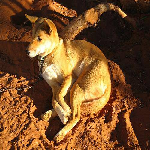

In [32]:
Image.open(PATH+fn).resize((150,150))

In [19]:
trn_tfms,val_tfms = tfms_from_model(arch, sz)

In [33]:
ds = FilesIndexArrayDataset([fn], np.array([0]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
np.argmax(preds)

37

In [61]:
im = trn_tfms(Image.open(PATH+fn))
preds = to_np(learn.model(V(T(im[None]).cuda())))
np.argmax(preds)

37

In [19]:
trn_tfms,val_tfms = tfms_from_model(arch, sz)

In [22]:
im = val_tfms(Image.open(PATH+fn))
preds = learn.predict_array(im[None])
np.argmax(preds)

33